In [255]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
def read_indata(path):
    '''
    :param path: a string of path saved the dataset
    :return: pandas datarame
    '''
    data = pd.read_csv(path)
    return data


## generate new column year for every data

def generate_year_month(df, colname):
    '''
    :param df: dataframe we want to add column year and month
    :param colname: a stirng column name in the dataframe saved the dateandtime
    :return: dataframe after adding the column
    '''
    df['year'] = pd.DatetimeIndex(df[colname]).year
    df['month'] = pd.DatetimeIndex(df[colname]).month
    #df['day'] = pd.DatetimeIndex(df[colname]).day

    #df['indextype'] = str(string)
    return df

In [5]:
def city_groupby(df, colname, city_name):
    '''This function mainly is used to process the AQI data.
    :param df: dataframe we want to divide base on city name
    :param colname: the column name in the dataframe saved the city name
    :param city_name: the specific city name 
    :return: dataframe after filter city and year from 2012 to 2018, group by year and month
    '''
    df = df[(df[colname].str.contains(city_name)) & (df.year>=2012) & (df.year<2018)]
    df = df.groupby(['year','month']).agg({'mean'})

    return df

In [90]:
def crime_count(df, date_colname,per):
    '''
    :param df: dataframe we want to count the number of crime
    :param colname: a string column name in the dataframe saved the date
    :return: dataframe after adding the column
    '''
    df['year'] = df[date_colname].str[6:10].astype(int)
    df['month'] = df[date_colname].str[0:2].astype(int)
    df['day'] =  df[date_colname].str[3:5].astype(int)
    df = df[(df.year>=2012) & (df.year<2018)]
    if per == 'month':
        df_per = df[[date_colname,'year', 'month']].groupby(['year', 'month']).count().rename(columns={date_colname:'count'})
    elif per == 'day':
        df_per = df[[date_colname,'year', 'month','day']].groupby(['year', 'month','day']).count().rename(columns={date_colname:'count'})
    #df['indextype'] = str(string)
    return df_per

In [379]:
def crime_airpollution_plot(df, city_name):
    """This function is used to draw plot to show trend of crime and AQI
    
    """
    ax = df.plot(secondary_y=['AQI_mean'],grid=True,figsize=(15,5))
    ax.set_title(city_name+" Crime and AQI")
    ax.set_ylabel('crime_count')
    ax.grid(linestyle="--", alpha=3)
    ax.right_ax.set_ylabel('AQI_mean')
    plt.show()

In [394]:
def crime_type_count(crime_df, type_col): 
    """This function is mainly used to count the number of crime in different crime type
    
    :param crime_df: dataframe we want to count the number of crime type
    :param type_col: a string column name in the dataframe saved the crime type
    :return: dataframe after adding the column
    """
    crime_df['count']= 0
    type_count = crime_df[[type_col,'count']].groupby([type_col]).count()
    type_count = type_count.sort_values("count", ascending = False)
    return type_count

def crime_type_word_count(crime_df, type_colname): 
    crime_word = crime_df[type_colname].str.split('\s|,', expand=True)
    word_count = crime_word.stack().value_counts()
    return word_count

In [ ]:
def normaolize_crime_type(crime_df, type_colname):
    crime_type = crime_df[[type_colname]].replace(regex=[r'^.*ASSAULT.*$', r'^.*HARRASSMENT.*$' ], value='ASSAULT')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*OFF.*$'], value='OFFENSES')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*BURGLARY.*$'], value='BURGLARY')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*THEFT.*$', r'^.*LARCENY.*$'], value='THEFT')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*DRUG.*$', r'^.*NARCOTIC.*$'], value='DRUG')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*VIOLATION.*$' , r'^.*PUB.*$', r'^.*WEAPON.*$', r'^.*WEAPON.*$'], value='VIOLATION')

    return crime_type

In [3]:
airpollution=pd.DataFrame()
airpollution_dir = './daily_aqi_by_cbsa/daily_aqi_by_cbsa_'
for i in range(2012,2018):
    file=read_indata(airpollution_dir+str(i)+'.csv')
    airpollution=airpollution.append(file)
airpollution.head()

#extract columns that need to analyze
#airpollution = airpollution[['City', 'Date Local', 'NO2 Mean','NO2 AQI', 'O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]

#extract columns that need to be analyzed
airpollution = airpollution[['CBSA', 'Date', 'AQI']]

airpollution.head()

,CBSA,Date,AQI
0,"Aberdeen, SD",2012-01-01,10
1,"Aberdeen, SD",2012-01-04,13
2,"Aberdeen, SD",2012-01-08,10
3,"Aberdeen, SD",2012-01-10,13
4,"Aberdeen, SD",2012-01-13,22


In [4]:
#generate year and month
airpollution = generate_year_month(airpollution, 'Date')
airpollution.head()

,CBSA,Date,AQI,year,month
0,"Aberdeen, SD",2012-01-01,10,2012,1
1,"Aberdeen, SD",2012-01-04,13,2012,1
2,"Aberdeen, SD",2012-01-08,10,2012,1
3,"Aberdeen, SD",2012-01-10,13,2012,1
4,"Aberdeen, SD",2012-01-13,22,2012,1


# Chicago crime and air pollution

In [178]:
Chicago_airpollution = city_groupby(airpollution, 'CBSA', 'Chicago')
Chicago_airpollution.head()


AQI
                 mean
year month           
2012 1      68.387097
     2      73.551724
     3      76.387097
     4      63.400000
     5      78.290323

In [179]:
Chicago_crime = read_indata('./Chicago_crime_2012-2017.csv')
Chicago_crime.head()
## count chicago crime
#chi_crime_per_month = chicago_crime[['ID', 'year', 'month']].groupby(['year', 'month']).size()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,31.0,20.0,20,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,29.0,25.0,17,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)"
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,29.0,19.0,17,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,17.0,68.0,11,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)"
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,38.0,17.0,17,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN


In [180]:
Chicago_crime_per_month = crime_count(Chicago_crime, 'Date', 'month')
Chicago_crime_per_month.head()
#crime_count(chicago_crime, 'Date', 'day')

count
year month       
2012 1      26265
     2      23869
     3      28561
     4      27178
     5      30088

In [380]:
Chicago_crime_airpollution = pd.merge(Chicago_airpollution, Chicago_crime_per_month,on=['year','month'])
Chicago_crime_airpollution.columns=['AQI_mean', 'crime_count']

Chicago_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      68.387097        26265
     2      73.551724        23869
     3      76.387097        28561
     4      63.400000        27178
     5      78.290323        30088

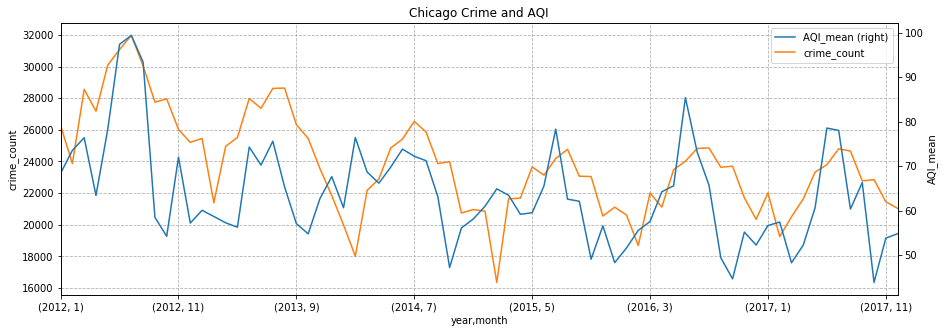

In [386]:
crime_airpollution_plot(Chicago_crime_airpollution,'Chicago')

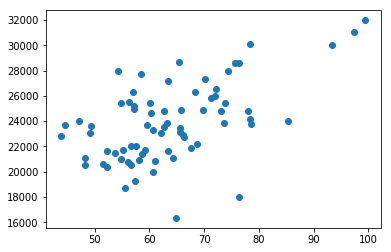

In [188]:
Chicago_crime_airpollution.corr() 
plt.scatter(Chicago_crime_airpollution.AQI_mean, Chicago_crime_airpollution.crime_count)


In [183]:
Chicago_crime_model = ols("crime_count ~ AQI_mean", data=Chicago_crime_airpollution).fit()
Chicago_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     30.94
Date:                Thu, 02 May 2019   Prob (F-statistic):           4.56e-07
Time:                        14:29:14   Log-Likelihood:                -667.16
No. Observations:                  72   AIC:                             1338.
Df Residuals:                      70   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e+04   1748.218      8.185      0.000    1.08e+04    1.78e+04
AQI_mean     149.9422     26.958      5.562      0.000      96.176     203.708
==============================================================================
Omnibus:                        3.974   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.135
Skew:                          -0.410   Prob(JB):                        0.209
Kurtosis:                       3.609   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [395]:
Chicago_crime_type = crime_type_count(Chicago_crime, 'Primary Type')
Chicago_crime_type.head()

,count
Primary Type,
THEFT,391847
BATTERY,311011
CRIMINAL DAMAGE,183242
NARCOTICS,147568
ASSAULT,109862


# Los Angeles crime and air pollution

In [112]:
LA_airpollution = city_groupby(airpollution, 'CBSA', 'Los Angeles')
LA_airpollution.head()

AQI
                  mean
year month            
2012 1       77.354839
     2       65.896552
     3       63.774194
     4       78.433333
     5      111.741935

In [170]:
#LA_crime = read_indata('./LA_Crime_Data_2010_2017.csv')
LA_crime = read_indata('./LA_Crime_Data_2010_to_Present.csv')
LA_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,61000673,04/07/2016,04/07/2016,2043,10,West Valley,1037,886,DISTURBING THE PEACE,1501,...,NaN,IC,Invest Cont,886.0,NaN,NaN,NaN,17100 VANOWEN ST,NaN,"(34.1939, -118.5055)"
1,131609876,04/02/2016,04/01/2016,1900,19,Mission,1902,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),NaN,...,NaN,IC,Invest Cont,420.0,NaN,NaN,NaN,13600 DRONEFIELD AV,NaN,"(34.3196, -118.4561)"
2,150319258,08/20/2016,08/20/2016,30,3,Southwest,325,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,AO,Adult Other,440.0,NaN,NaN,NaN,2800 MENLO AV,NaN,"(34.0294, -118.2903)"
3,151601466,01/01/2016,01/01/2016,2040,16,Foothill,1642,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0334 0411 1402,...,OTHER KNIFE,AA,Adult Arrest,230.0,998.0,NaN,NaN,10500 CAYUGA AV,NaN,"(34.2606, -118.4238)"
4,151601467,01/02/2016,01/02/2016,30,16,Foothill,1668,624,BATTERY - SIMPLE ASSAULT,0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,9800 MARCUS AV,NaN,"(34.2463, -118.2818)"


In [187]:
LA_crime_per_month = crime_count(LA_crime, 'Date Occurred', 'month')
LA_crime_per_month.head()

count
year month       
2012 1      17745
     2      15316
     3      16562
     4      16275
     5      17466

In [381]:
LA_crime_airpollution = pd.merge(LA_airpollution, LA_crime_per_month,on=['year','month'])
LA_crime_airpollution.columns=['AQI_mean', 'crime_count']
LA_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                         
2012 1       77.354839        17745
     2       65.896552        15316
     3       63.774194        16562
     4       78.433333        16275
     5      111.741935        17466

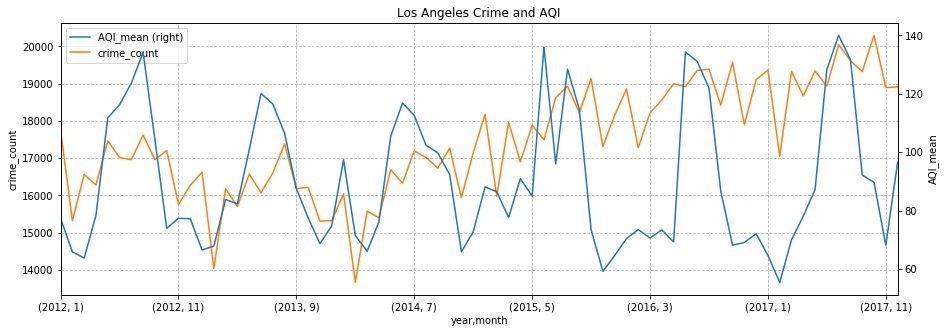

In [384]:
crime_airpollution_plot(LA_crime_airpollution,'Los Angeles')

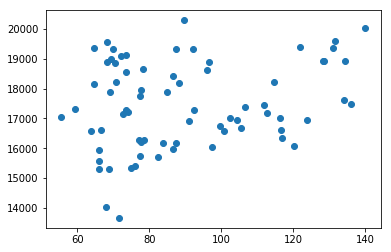

In [175]:
LA_crime_airpollution.corr() 

plt.scatter(LA_crime_airpollution.AQI_mean, LA_crime_airpollution.crime_count)

In [176]:
LA_crime_model = ols("crime_count ~ AQI_mean", data=LA_crime_airpollution).fit()
LA_crime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crime_count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.530
Date:                Thu, 02 May 2019   Prob (F-statistic):             0.0368
Time:                        14:28:20   Log-Likelihood:                -623.86
No. Observations:                  72   AIC:                             1252.
Df Residuals:                      70   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.605e+04    687.062     23.354      0.000    1.47e+04    1.74e+04
AQI_mean      15.7572      7.403      2.128      0.037       0.992      30.523
==============================================================================
Omnibus:                        3.024   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                1.721
Skew:                          -0.043   Prob(JB):                        0.423
Kurtosis:                       2.248   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [396]:
LA_crime_type = crime_type_count(LA_crime, 'Crime Code Description')
LA_crime_type.head()


,count
Crime Code Description,
BATTERY - SIMPLE ASSAULT,176948
BURGLARY FROM VEHICLE,150446
VEHICLE - STOLEN,149165
THEFT PLAIN - PETTY ($950 & UNDER),138790
BURGLARY,138790


# New York crime and air pollution

In [122]:
NYC_crime = read_indata('./NYPD_Complaint_Data_Historic.csv')
NYC_crime.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,236535100,04/20/2010,02:30:00,NaN,NaN,63.0,04/20/2010,578,HARRASSMENT 2,637.0,...,F,NaN,40.636303,-73.919049,"(40.636302737, -73.919048996)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
1,125657244,04/20/2010,02:15:00,04/20/2010,02:20:00,115.0,04/20/2010,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.750832,-73.874087,"(40.750831801, -73.874087084)",PATROL BORO QUEENS NORTH,NaN,18-24,WHITE HISPANIC,M
2,108722085,04/20/2010,02:00:00,NaN,NaN,48.0,04/20/2010,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.849628,-73.887296,"(40.849628291, -73.887295663)",PATROL BORO BRONX,NaN,25-44,BLACK,F
3,798889672,04/20/2010,02:00:00,04/20/2010,06:30:00,75.0,04/20/2010,107,BURGLARY,213.0,...,NaN,NaN,40.676199,-73.884449,"(40.676198799, -73.884448642)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,390790746,04/20/2010,02:00:00,04/20/2010,09:30:00,113.0,04/20/2010,341,PETIT LARCENY,321.0,...,NaN,NaN,40.693635,-73.753149,"(40.693635482, -73.753148571)",PATROL BORO QUEENS SOUTH,NaN,45-64,UNKNOWN,M


In [123]:
NYC_crime_per_month = crime_count(nyc_crime, 'RPT_DT', 'month')
NYC_crime_per_month.head()

count
year month       
2012 1      41569
     2      39248
     3      43539
     4      41721
     5      44949

In [124]:
NYC_airpollution = city_groupby(airpollution, 'CBSA', 'New York')
NYC_airpollution.head()

AQI
                 mean
year month           
2012 1      61.000000
     2      56.965517
     3      54.935484
     4      57.000000
     5      65.451613

In [382]:
NYC_crime_airpollution = pd.merge(NYC_airpollution, NYC_crime_per_month,on=['year','month'])
NYC_crime_airpollution.columns=['AQI_mean', 'crime_count']
NYC_crime_airpollution.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


AQI_mean  crime_count
year month                        
2012 1      61.000000        41569
     2      56.965517        39248
     3      54.935484        43539
     4      57.000000        41721
     5      65.451613        44949

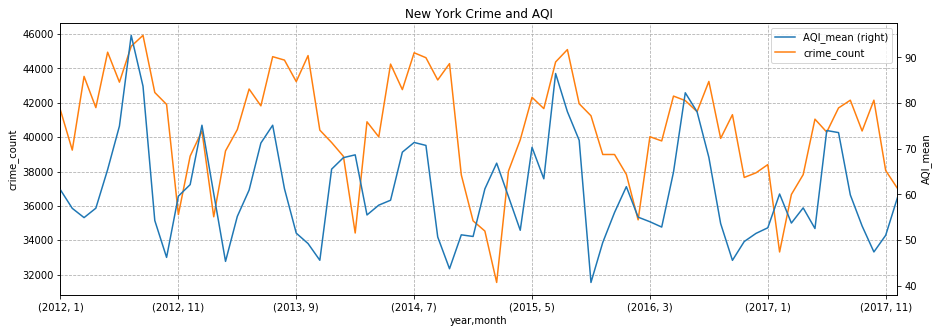

In [374]:
crime_airpollution_plot(NYC_crime_airpollution,'New York')

In [126]:
NYC_crime_airpollution.corr() 

,AQI_mean,crime_count
AQI_mean,1.000000,0.304485
crime_count,0.304485,1.000000


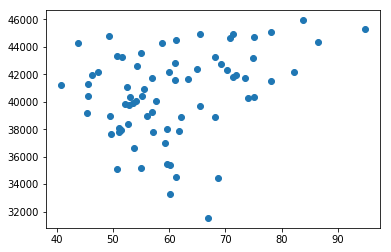

In [127]:
plt.scatter(NYC_crime_airpollution.AQI_mean, NYC_crime_airpollution.crime_count)

In [397]:
NYC_crime_type = crime_type_count(NYC_crime, 'PD_DESC')
NYC_crime_type.head()

,count
PD_DESC,
ASSAULT 3,521223
"HARASSMENT,SUBD 3,4,5",461926
AGGRAVATED HARASSMENT 2,322742
"HARASSMENT,SUBD 1,CIVILIAN",274329
"LARCENY,PETIT FROM STORE-SHOPL",270461


# Crime Type and Airpollution

In [390]:
Chicago_crimetype_word_count = crime_type_word_count(Chicago_crime, 'Primary Type')
Chicago_crimetype_word_count.head()

THEFT        463603
BATTERY      311011
CRIMINAL     226693
DAMAGE       183242
NARCOTICS    147568
dtype: int64

In [389]:
LA_crimetype_word_count = crime_type_word_count(LA_crime, 'Crime Code Description')
LA_crimetype_word_count.head()

-          1027659
ASSAULT     480755
&           461563
THEFT       453733
VEHICLE     418245
dtype: int64

In [391]:
NYC_crimetype_word_count = crime_type_word_count(NYC_crime, 'OFNS_DESC')
NYC_crimetype_word_count.head()

&          1649038
LARCENY    1617975
RELATED    1245785
PETIT       987329
ASSAULT     849113
dtype: int64

In [413]:
#concat word count in crime type of three different cities to show the most frequent word
word_concat = pd.DataFrame(pd.concat([Chicago_crimetype_word_count, LA_crimetype_word_count,NYC_crimetype_word_count]).rename('count'))
word_concat = word_concat.sort_values("count", ascending=False)
word_concat.groupby(word_concat.index).agg({'count':'sum'}).sort_values("count", ascending=False).head(100)


,count
&,2110601
LARCENY,1617975
ASSAULT,1448405
RELATED,1245785
-,1027697
PETIT,987329
CRIMINAL,959303
OF,935938
THEFT,920946
OFFENSES,795294


In [295]:
NYC_crime['OFNS_DESC'][0]
a=NYC_crime.head(50)
a

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,236535100,04/20/2010,02:30:00,NaN,NaN,63.0,04/20/2010,578,HARRASSMENT 2,637.0,...,F,NaN,40.636303,-73.919049,"(40.636302737, -73.919048996)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
1,125657244,04/20/2010,02:15:00,04/20/2010,02:20:00,115.0,04/20/2010,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.750832,-73.874087,"(40.750831801, -73.874087084)",PATROL BORO QUEENS NORTH,NaN,18-24,WHITE HISPANIC,M
2,108722085,04/20/2010,02:00:00,NaN,NaN,48.0,04/20/2010,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.849628,-73.887296,"(40.849628291, -73.887295663)",PATROL BORO BRONX,NaN,25-44,BLACK,F
3,798889672,04/20/2010,02:00:00,04/20/2010,06:30:00,75.0,04/20/2010,107,BURGLARY,213.0,...,NaN,NaN,40.676199,-73.884449,"(40.676198799, -73.884448642)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,390790746,04/20/2010,02:00:00,04/20/2010,09:30:00,113.0,04/20/2010,341,PETIT LARCENY,321.0,...,NaN,NaN,40.693635,-73.753149,"(40.693635482, -73.753148571)",PATROL BORO QUEENS SOUTH,NaN,45-64,UNKNOWN,M
5,234374778,04/20/2010,02:00:00,NaN,NaN,114.0,04/20/2010,117,DANGEROUS DRUGS,503.0,...,NaN,NaN,40.756355,-73.913413,"(40.756354828, -73.913413047)",PATROL BORO QUEENS NORTH,NaN,NaN,UNKNOWN,E
6,988105718,04/20/2010,02:00:00,04/20/2010,09:00:00,122.0,04/20/2010,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.550494,-74.160317,"(40.550493749, -74.160316695)",PATROL BORO STATEN ISLAND,NaN,25-44,WHITE HISPANIC,M
7,548968559,04/20/2010,02:00:00,04/20/2010,04:20:00,10.0,04/20/2010,341,PETIT LARCENY,338.0,...,NaN,NaN,40.743470,-74.005393,"(40.743470455, -74.005393004)",PATROL BORO MAN SOUTH,NaN,18-24,BLACK,M
8,751189514,04/20/2010,01:50:00,04/20/2010,02:00:00,73.0,04/20/2010,355,OFFENSES AGAINST THE PERSON,181.0,...,NaN,NaN,40.667573,-73.907296,"(40.667573424, -73.907295766)",PATROL BORO BKLYN NORTH,NaN,25-44,BLACK,F
9,978160055,04/20/2010,01:50:00,04/20/2010,02:00:00,73.0,04/20/2010,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,NaN,40.667573,-73.907296,"(40.667573424, -73.907295766)",PATROL BORO BKLYN NORTH,NaN,18-24,BLACK,M


In [392]:
def normaolize_crime_type(crime_df, type_colname):
    crime_type = crime_df[[type_colname]].replace(regex=[r'^.*ASSAULT.*$', r'^.*HARRASSMENT.*$' ], value='ASSAULT')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*OFF.*$'], value='OFFENSES')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*BURGLARY.*$'], value='BURGLARY')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*THEFT.*$', r'^.*LARCENY.*$'], value='THEFT')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*DRUG.*$', r'^.*NARCOTIC.*$'], value='DRUG')
    crime_type = crime_type[[type_colname]].replace(regex=[r'^.*VIOLATION.*$' , r'^.*PUB.*$', r'^.*WEAPON.*$', r'^.*WEAPON.*$'], value='VIOLATION')

    return crime_type

In [351]:
normaolize_crime_type(a, 'OFNS_DESC')

,OFNS_DESC
0,ASSAULT
1,ASSAULT
2,VIOLATION
3,BURGLARY
4,THEFT
5,DRUG
6,CRIMINAL MISCHIEF & RELATED OF
7,THEFT
8,OFFENSES AGAINST THE PERSON
9,ASSAULT
